En esta sección se llevará a cabo la construcción de los modelos supervisados de Machine Learning que realicen una predicción de cuál sería el valor de los Triglicéridos de los pacientes. 

### Librerías utilizadas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

#conda install python-graphviz
import graphviz

### Datos utilizados

Se importan los datos que resultaron del proceso de preparación de datos.

In [2]:
data = pd.read_csv('C:/Users/gusta/OneDrive/Documentos/Tesis/Datos/Datos_prep.csv') 

Se seleccionan las variables que serán utilizadas como variables dependientes.

In [3]:
var_predictivas = ['CC','VFA','CC_GRAS','CC_MUSC','CC_AGUA','PAM',
                   'TALLA','IMC','TARGET_TRI']
X = data[var_predictivas] 
y = data['TRI'] 

### Separación de datos

En el modelado predictivo, la estrategia estándar para una evaluación honesta del rendimiento de los modelos se da a través de la separación de los datos en dos subconjuntos. Una parte de la fuente de datos se utiliza para ajustar los modelos: el conjunto de datos de entrenamiento. El resto de la fuente de datos se utiliza para dar una estimación honesta final de la generalizacion de los modelos: el conjunto de datos de validación.

Para el presente trabajo el conjunto de entrenamiento representará el 70% de los datos originales y el conjunto de validación tendrá el 30% restante.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

## Modelos supervisados para Regresión

Acorde a lo presentado anteriormente, se utilizarán modelos basados en árboles.

### Árbol de decisión

El primer modelo que se contruye es un Árbol de Decisión, de la librería Scikit-learn, además, se hace uso del método "RandomizedSearchCV" para encontrar los parámetros óptimos para el modelo, usando el Coeficiente de Determinación como métrica para la medición del performance de los modelos.

In [5]:
# Parámetros para el modelo:
param_dict_tr= dict(criterion=['mse','friedman_mse','mae'], 
                    splitter=['best','random'], max_depth=range(2,30),
                    max_features=range(2,10), min_samples_leaf=[0.05])

# Se crea el árbol de decisión para regresión:
tr_reg = DecisionTreeRegressor()

# Autotuning del modelo:
rsgrid_tr = RandomizedSearchCV(tr_reg, param_dict_tr, cv=20, n_iter=40, 
                               n_jobs=-1, scoring='r2')
rsgrid_tr.fit(X_train,y_train)
tr_reg = rsgrid_tr.best_estimator_

# Se entrena el árbol de decisión:
tr_reg = tr_reg.fit(X_train,y_train)

A continuación, se muestran los parámetros del Árbol de Decisión con los cuales se maximizó el valor la R-cuadrada.

In [6]:
rsgrid_tr.best_estimator_

DecisionTreeRegressor(criterion='friedman_mse', max_depth=22, max_features=9,
                      min_samples_leaf=0.05, splitter='random')

### Random Forest

El segundo modelo que se contruye es un Random Forest, de la librería Scikit-learn, además, se hace uso del método "RandomizedSearchCV" para encontrar los parámetros óptimos para el modelo, usando el Coeficiente de Determinación como métrica para la medición del performance de los modelos.

In [7]:
# Parámetros para el modelo:
param_dict_rf= dict(n_estimators=range(50,150), criterion=['mse','mae'],
                    max_depth=range(20,30), max_features=range(2,10),
                    min_samples_leaf=[0.05])

# Se crea el Random Forest para regresión:
rf_reg = RandomForestRegressor()

#Autotuning del modelo:
rsgrid_rf = RandomizedSearchCV(rf_reg, param_dict_rf, cv=20, n_iter=40, 
                               n_jobs=-1, scoring='r2')
rsgrid_rf.fit(X_train,y_train)
rf_reg = rsgrid_rf.best_estimator_

# Se entrena el Random Forest
rf_reg = rf_reg.fit(X_train,y_train)

A continuación, se muestran los parámetros del Random Forest con los cuales se maximizó el valor la R-cuadrada.

In [8]:
rsgrid_rf.best_estimator_

RandomForestRegressor(max_depth=23, max_features=7, min_samples_leaf=0.05,
                      n_estimators=65)

### Gradient Boosting

El tercer modelo que se contruye es un Gradient Boosting, de la librería Scikit-learn, además, se hace uso del método "RandomizedSearchCV" para encontrar los parámetros óptimos para el modelo, usando el Coeficiente de Determinación como métrica para la medición del performance de los modelos.

In [9]:
# Parámetros para el modelo:
param_dict_gb= dict(criterion=['friedman_mse','mse','mae'],
                    loss=['ls','lad','huber','quantile'], 
                    learning_rate=[0.05,0.10,0.15,0.20,0.25,0.30,0.5,0.8,1],
                    max_depth=range(2,10), max_features=range(2,10),
                    min_samples_leaf=[0.05], n_estimators=range(50,150))

# Se crea el Gradient Boosting para regresión:
gb_reg = GradientBoostingRegressor()

#Autotuning del modelo:
rsgrid_gb = RandomizedSearchCV(gb_reg, param_dict_gb, cv=20, n_iter=40, 
                               n_jobs=-1, scoring='r2')
rsgrid_gb.fit(X_train,y_train)
gb_reg = rsgrid_gb.best_estimator_

# Se entrena el Gradient Boosting
gb_reg = gb_reg.fit(X_train,y_train)

A continuación, se muestran los parámetros del Gradient Boosting con los cuales se maximizó el valor la R-cuadrada.

In [10]:
rsgrid_gb.best_estimator_

GradientBoostingRegressor(criterion='mse', learning_rate=0.05, max_depth=8,
                          max_features=8, min_samples_leaf=0.05,
                          n_estimators=92)

### XGBoost

El último modelo que se contruye es un XGBoost, de la librería XGBoost, además, se hace uso del método "RandomizedSearchCV" para encontrar los parámetros óptimos para el modelo, usando el Coeficiente de Determinación como métrica para la medición del performance de los modelos.

In [11]:
# Parámetros para el modelo:
param_dict_xgb= dict(booster=['gbtree', 'dart'],
                     eta=[0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
                     max_depth=range(20,30), n_estimators=range(50,150))

# Se crea el XGBoost para regresión:
xg_reg = XGBRegressor()

#Autotuning del modelo:
rsgrid_xgb = RandomizedSearchCV(xg_reg, param_dict_xgb, cv=20, n_iter=40, 
                                n_jobs=-1, scoring='r2')
rsgrid_xgb.fit(X_train,y_train)
xg_reg = rsgrid_xgb.best_estimator_

# Se entrena el XGBoost:
xg_reg = xg_reg.fit(X_train,y_train)

A continuación, se muestran los parámetros del XGBoost con los cuales se maximizó el valor la R-cuadrada.

In [12]:
rsgrid_xgb.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.05, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.0500000007, max_delta_step=0, max_depth=26,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=84, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

### Estadísticos de precisión

Para medir el desempeño de los modelos se utilizará el conjunto de datos de validación y se analizarán los estadísticos RMSE y el Coeficiente de Determinación de cada uno de los modelos.

In [13]:
modelos = [{'label':'Decision Tree','modelo':tr_reg,},
           {'label':'Random Forest','modelo':rf_reg,},
           {'label':'Gradient Boosting','modelo':gb_reg,},
           {'label':'XGBoost','modelo':xg_reg,}]

for m in modelos:
    modelo = m['modelo']
    R2 =  modelo.score(X_test, y_test)
    y_pred = modelo.predict(X_test)
    print('%s R-squared: %0.2f' % (m['label'], R2))
    print("%s RMSE: %.2f" % (m['label'],mean_squared_error(y_test,y_pred,squared=False)))

Decision Tree R-squared: 0.61
Decision Tree RMSE: 36.97
Random Forest R-squared: 0.61
Random Forest RMSE: 37.00
Gradient Boosting R-squared: 0.60
Gradient Boosting RMSE: 37.68
XGBoost R-squared: 0.41
XGBoost RMSE: 45.43


Al analizar el Coeficiente de Determinación se puede observar que los primeros tres modelos son los que tienen un mejor desempeño y, dentro de estos tres modelos, los dos mejores son el Árbol de Decisión y el Random Forest. Para determinar cual de los dos es el modelo campeón, se analiza el RMSE y se selecciona aquel que tiene el error más chico, sin embargo, dado que la diferencia es tan pequeña en los dos, se decide optar por el Random Forest el cual, al ser un ensamble de árboles de decisión, es un modelo más robusto.

In [14]:
champion_model=rf_reg

### Valores pronosticados

A continuación, se muestran los valores de Triglicéridos (medidos a través de una química sanguínea) de los primeros 15 pacientes, pertenecientes al grupo utilizado para la validación del modelo, junto con los valores pronosticados por el modelo campeón.

In [15]:
y_pred = pd.DataFrame(champion_model.predict(X_test),columns=['TRI_pred'])
y_test.reset_index(inplace=True, drop=True)
datos_pronosticados = pd.concat([y_test,y_pred], axis=1)
datos_pronosticados.head(15)

,TRI,TRI_pred
0,80,86.011154
1,47,81.450798
2,71,93.136139
3,181,198.140109
4,107,106.339434
5,178,187.307481
6,96,79.264214
7,98,97.885221
8,65,90.044446
9,92,95.285338


## Datos para ROI

Para hacer el ejercicio de ROI se utilizará un subconjunto de los datos originales (el 10%), los cuales serán calificados por cada uno de los modelos campeones, en este caso, el modelo campeón para pronosticar el valor de Triglicéridos que tendría el paciente. La finalidad es, dentro de las conclusiones, determinar la relación costo-beneficio de usar este tipo de modelos para diagnosticar la prevalencia del Síndrome Metabólico en jóvenes mexicanos.

In [16]:
datos_roi = pd.read_csv('C:/Users/gusta/OneDrive/Documentos/Tesis/Datos/Datos_roi.csv') 

In [17]:
var_predictivas.remove('TARGET_TRI')
var_predictivas.append('TRI_Class')

X_roi = datos_roi[var_predictivas] 
X_roi= X_roi.rename(columns={'TRI_Class':'TARGET_TRI'})

y_roi = datos_roi['TRI'] 

Se hacen el pronóstico del valor de Triglicéridos que tendrían los pacientes:

In [18]:
predicted_val = pd.DataFrame(champion_model.predict(X_roi),columns=['TRI_reg'])

datos_pronosticados = pd.concat([y_roi,predicted_val], axis=1)
datos_pronosticados.head(15)

,TRI,TRI_reg
0,88,196.040679
1,185,195.403891
2,78,90.244379
3,91,78.907518
4,59,91.958599
5,206,208.833650
6,106,210.057706
7,111,210.822124
8,108,195.208948
9,68,83.597603


Se calcula la raíz cuadrada del error cuadrático medio (RMSE), dado que una de las variables de entrada para este modelo (TARGET_TRI)es la variable de salida del modelo de clasificación se incrementa el error en el pronóstico.  

In [19]:
RMSE = mean_squared_error(y_pred=predicted_val, y_true=y_roi, squared=False)
print("RMSE: %.2f" % (RMSE))

RMSE: 76.81


Se guardan los valores pronosticados por el modelo.

In [20]:
datos_roi['TRI_reg'] = champion_model.predict(X_roi)

datos_roi.to_csv('C:/Users/gusta/OneDrive/Documentos/Tesis/Datos/Datos_roi.csv',
                 index=False)

## Interpretación del árbol de decisión

Por último, para ayudar a la interpretación del funcionamiento de los modelos, se muestra el árbol de decisión construido.

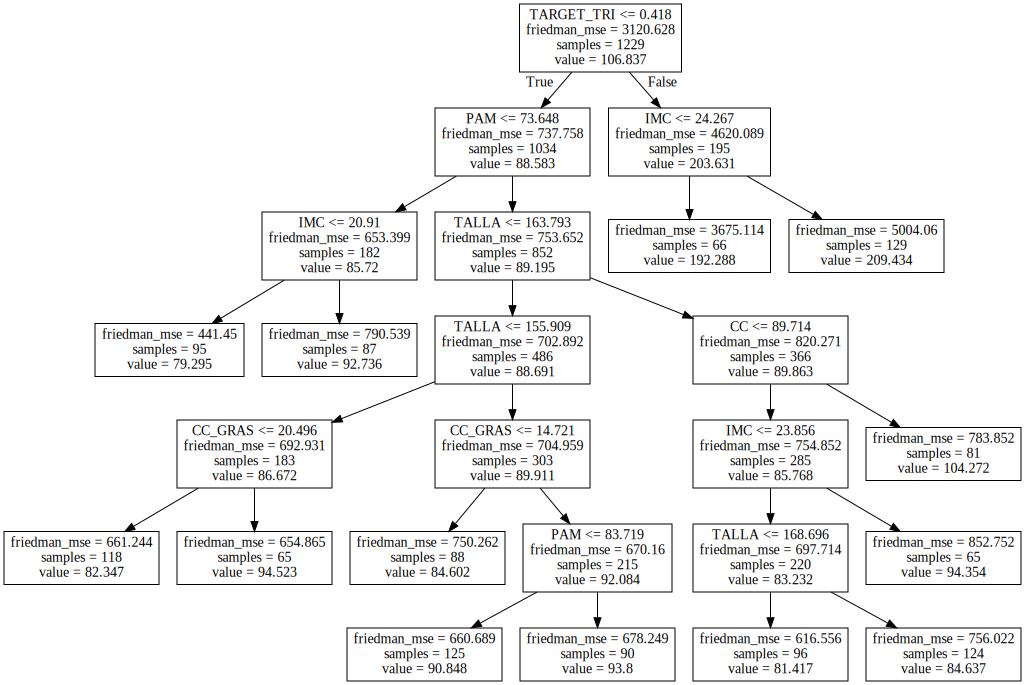

In [22]:
# Nombres:
var_predictivas.remove('TRI_Class')
var_predictivas.append('TARGET_TRI')

Xnom=data[var_predictivas]

# Árbol:
tree.export_graphviz(tr_reg, out_file="tree_reg_TRI.dot", feature_names=Xnom.columns)
with open("tree_reg_TRI.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)